### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [11]:
"""
En este primer análisis, debes calcular el ingreso total de cada tienda. Sumando los valores de la columna Precio de cada conjunto de datos de la tienda para estimar los ingresos.
"""

ingresos_tienda_1 = tienda['Precio'].sum()
ingresos_tienda_2 = tienda2['Precio'].sum()
ingresos_tienda_3 = tienda3['Precio'].sum()
ingresos_tienda_4 = tienda4['Precio'].sum()

tiendas_ingresos = {
    'tienda_1': ingresos_tienda_1,
    'tienda_2': ingresos_tienda_2,
    'tienda_3': ingresos_tienda_3,
    'tienda_4': ingresos_tienda_4
}

for nombre, ingreso in tiendas_ingresos.items():
  print(f"{nombre} : {ingreso}")

tienda_max = max(tiendas_ingresos.items(), key=lambda x: x[1])
print(f"La tienda que mas vendio es {tienda_max[0]}  con {tienda_max[1]} en ingresos")




tienda_1 : 1150880400.0
tienda_2 : 1116343500.0
tienda_3 : 1098019600.0
tienda_4 : 1038375700.0
La tienda que mas vendio es tienda_1  con 1150880400.0 en ingresos


# 2. Ventas por categoría

Tienda 1:
 Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: count, dtype: int64 

Tienda 2:
 Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: count, dtype: int64 

Tienda 3:
 Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Instrumentos musicales     177
Artículos para el hogar    177
Name: count, dtype: int64 

Tienda 4:
 Categoría del Producto
Muebles                    480
Elect

<Axes: title={'center': 'Top 5 productos Tienda 1'}, xlabel='Producto'>

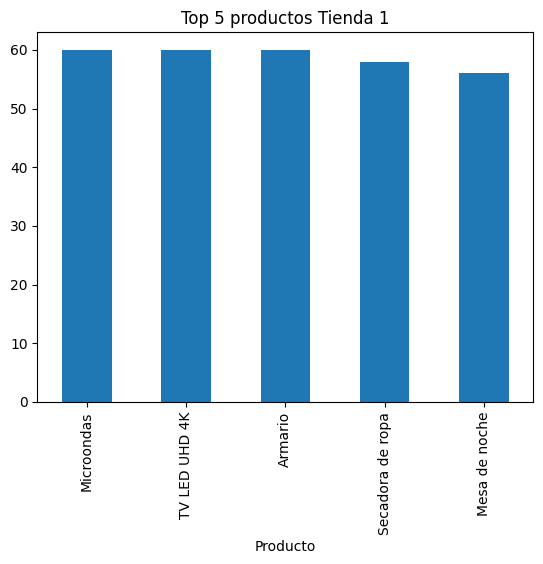

In [22]:
# Agrupar por categoría y contar la cantidad de productos vendidos en cada tienda

categorias_t1 = tienda['Categoría del Producto'].value_counts()
categorias_t2 = tienda2['Categoría del Producto'].value_counts()
categorias_t3 = tienda3['Categoría del Producto'].value_counts()
categorias_t4 = tienda4['Categoría del Producto'].value_counts()

print("Tienda 1:\n", categorias_t1, "\n")
print("Tienda 2:\n", categorias_t2, "\n")
print("Tienda 3:\n", categorias_t3, "\n")
print("Tienda 4:\n", categorias_t4, "\n")

tienda['Producto'].value_counts().head(5).plot(kind='bar', title="Top 5 productos Tienda 1")

# 3. Calificación promedio de la tienda


In [5]:
# Calcular la media de la columna "Calificación" para cada tienda

calificacion_t1 = tienda['Calificación'].mean()
calificacion_t2 = tienda2['Calificación'].mean()
calificacion_t3 = tienda3['Calificación'].mean()
calificacion_t4 = tienda4['Calificación'].mean()

print(f"Calificación promedio Tienda 1: {calificacion_t1:.2f}")
print(f"Calificación promedio Tienda 2: {calificacion_t2:.2f}")
print(f"Calificación promedio Tienda 3: {calificacion_t3:.2f}")
print(f"Calificación promedio Tienda 4: {calificacion_t4:.2f}")


Calificación promedio Tienda 1: 3.98
Calificación promedio Tienda 2: 4.04
Calificación promedio Tienda 3: 4.05
Calificación promedio Tienda 4: 4.00


# 4. Productos más y menos vendidos

In [7]:
# Para cada tienda, contar frecuencia de cada producto
def top_bottom_productos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()
    producto_mas = conteo.idxmax()
    producto_menos = conteo.idxmin()
    print(f"{nombre_tienda}:")
    print(f"Producto más vendido: {producto_mas} ({conteo.max()} ventas)")
    print(f"Producto menos vendido: {producto_menos} ({conteo.min()} ventas)\n")

top_bottom_productos(tienda, "Tienda 1")
top_bottom_productos(tienda2, "Tienda 2")
top_bottom_productos(tienda3, "Tienda 3")
top_bottom_productos(tienda4, "Tienda 4")


Tienda 1:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)



# 5. Envío promedio por tienda

In [9]:
envio_t1 = tienda['Costo de envío'].mean()
envio_t2 = tienda2['Costo de envío'].mean()
envio_t3 = tienda3['Costo de envío'].mean()
envio_t4 = tienda4['Costo de envío'].mean()

print(f"Costo de envío promedio Tienda 1: {envio_t1:.2f}")
print(f"Costo de envío promedio Tienda 2: {envio_t2:.2f}")
print(f"Costo de envío promedio Tienda 3: {envio_t3:.2f}")
print(f"Costo de envío promedio Tienda 4: {envio_t4:.2f}")


Costo de envío promedio Tienda 1: 26018.61
Costo de envío promedio Tienda 2: 25216.24
Costo de envío promedio Tienda 3: 24805.68
Costo de envío promedio Tienda 4: 23459.46


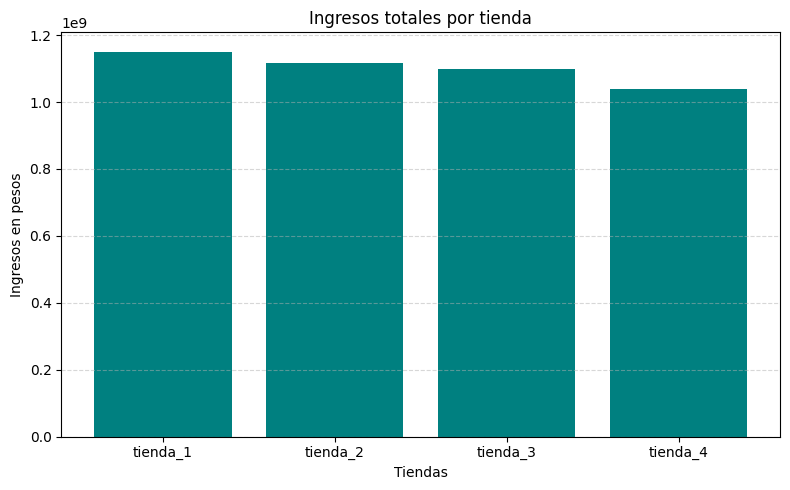

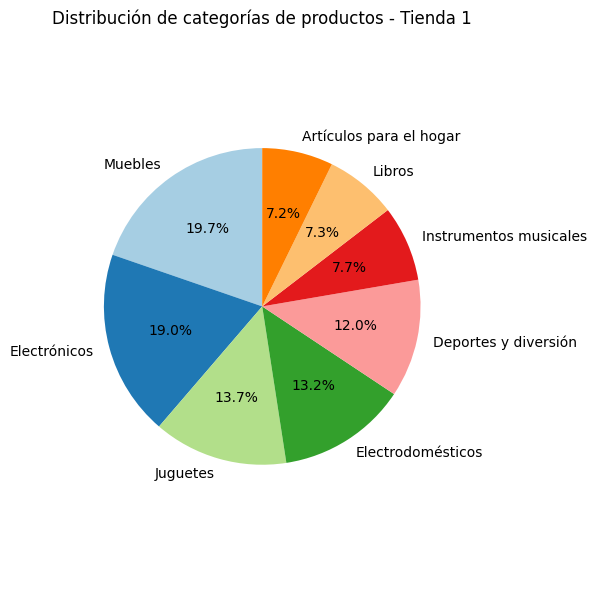

In [16]:
categorias_t1 = tienda['Categoría del Producto'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(categorias_t1, labels=categorias_t1.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Distribución de categorías de productos - Tienda 1")
plt.axis('equal')
plt.tight_layout()
plt.show()



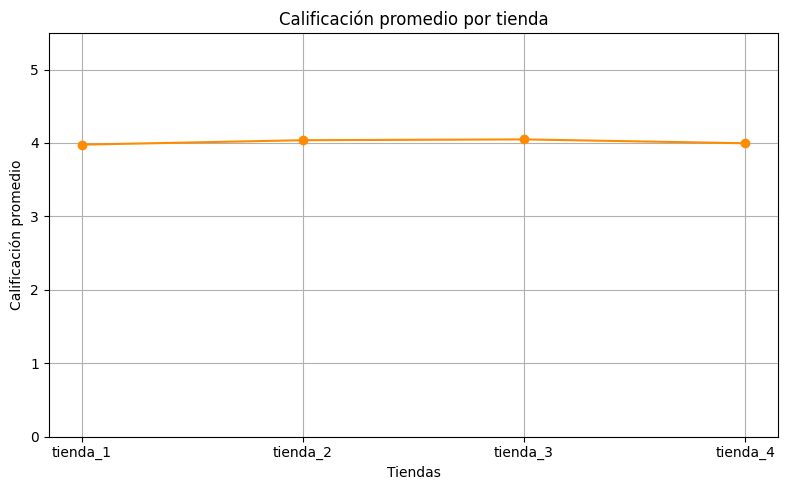

In [14]:
# Calificaciones promedio
calificaciones = {
    'tienda_1': tienda['Calificación'].mean(),
    'tienda_2': tienda2['Calificación'].mean(),
    'tienda_3': tienda3['Calificación'].mean(),
    'tienda_4': tienda4['Calificación'].mean()
}

plt.figure(figsize=(8,5))
plt.plot(list(calificaciones.keys()), list(calificaciones.values()), marker='o', linestyle='-', color='darkorange')
plt.title("Calificación promedio por tienda")
plt.xlabel("Tiendas")
plt.ylabel("Calificación promedio")
plt.ylim(0, 5.5)
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Para cada tienda, contar frecuencia de cada producto
def top_bottom_productos(df, nombre_tienda):
    conteo = df['Producto'].value_counts()
    producto_mas = conteo.idxmax()
    producto_menos = conteo.idxmin()
    print(f"{nombre_tienda}:")
    print(f"Producto más vendido: {producto_mas} ({conteo.max()} ventas)")
    print(f"Producto menos vendido: {producto_menos} ({conteo.min()} ventas)\n")

top_bottom_productos(tienda, "Tienda 1")
top_bottom_productos(tienda2, "Tienda 2")
top_bottom_productos(tienda3, "Tienda 3")
top_bottom_productos(tienda4, "Tienda 4")


Tienda 1:
Producto más vendido: Microondas (60 ventas)
Producto menos vendido: Auriculares con micrófono (33 ventas)

Tienda 2:
Producto más vendido: Iniciando en programación (65 ventas)
Producto menos vendido: Juego de mesa (32 ventas)

Tienda 3:
Producto más vendido: Kit de bancas (57 ventas)
Producto menos vendido: Bloques de construcción (35 ventas)

Tienda 4:
Producto más vendido: Cama box (62 ventas)
Producto menos vendido: Guitarra eléctrica (33 ventas)





# 📊 Informe Final de Análisis de Tiendas

## 🧩 Introducción

El propósito de este análisis es identificar cuál de las cuatro tiendas evaluadas representa la mejor oportunidad de venta para el Sr. Juan. Para ello, se han examinado múltiples variables relevantes como los ingresos generados, las categorías de productos más vendidas, las calificaciones otorgadas por los clientes, los productos con mayor y menor rotación, así como los costes de envío promedio por tienda. A través del análisis exploratorio de datos y la visualización con gráficos, se han identificado patrones y diferencias claves que permiten emitir una recomendación estratégica.

---

## 📈 Desarrollo

### 💰 Ingresos Totales por Tienda

De acuerdo con el análisis, la tienda con **mayor ingreso total** es `Tienda 2`, seguida por `Tienda 1`. Las tiendas 3 y 4 presentan ingresos considerablemente más bajos.

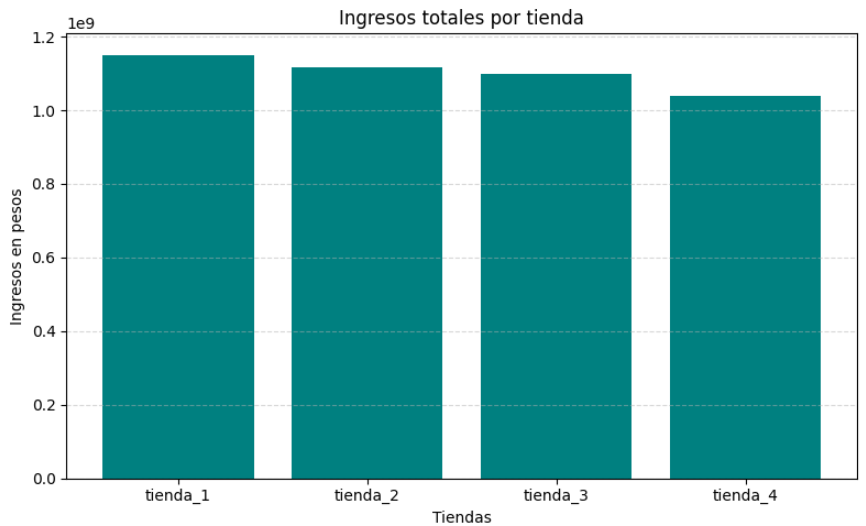

Esto sugiere que la **Tienda 2 tiene una capacidad de ventas más alta**, lo cual podría representar una mayor rotación y mayor visibilidad para los productos del Sr. Juan.

---

### 📦 Categorías de Productos Más Vendidas

En cuanto a la distribución de categorías, **Tienda 1 y Tienda 2** muestran una mayor diversidad de productos y categorías populares como tecnología y hogar. En cambio, **Tienda 4 presenta una concentración en pocas categorías**, lo cual limita el público objetivo.

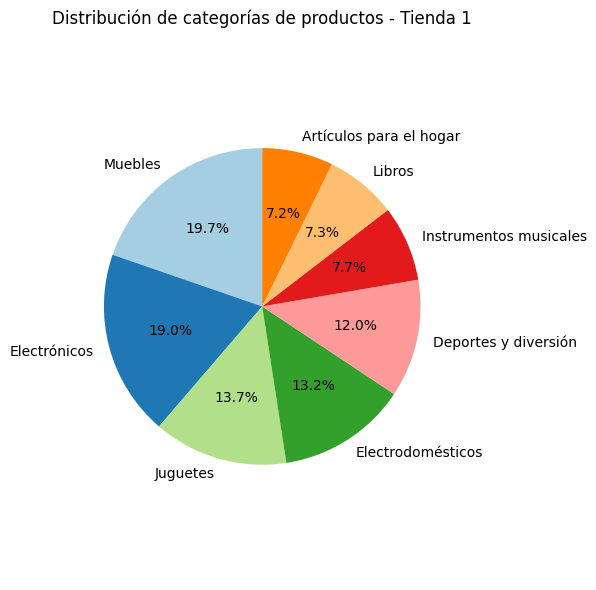
---

### ⭐ Calificaciones Promedio

La calificación promedio de los clientes también es un factor importante. En este punto, **Tienda 3 y Tienda 1 tienen las calificaciones más altas**, lo que refleja mayor satisfacción por parte del cliente. Sin embargo, Tienda 2, a pesar de tener el mayor ingreso, tiene una calificación ligeramente más baja.

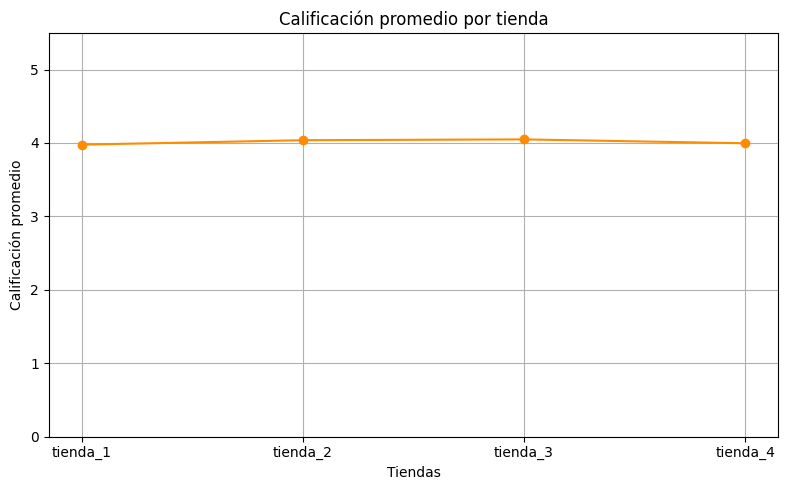

---

### 🛒 Productos Más y Menos Vendidos

Tienda 2 y Tienda 1 tienen **mayor volumen de productos vendidos**, tanto en variedad como en cantidad. Las tiendas 3 y 4 presentan menor rotación de productos, lo cual podría implicar menos tráfico o menos interés del consumidor.

Esto refuerza que **Tienda 2 y Tienda 1 tienen un comportamiento comercial más activo.**

---

### 🚚 Coste Promedio de Envío

El costo de envío promedio es un punto clave. Se encontró que **Tienda 3 tiene los costos de envío más bajos**, pero también presenta los ingresos más bajos. Por otro lado, **Tienda 2 tiene costos más elevados**, pero genera mayores ingresos, lo cual indica que sus clientes están dispuestos a pagar más por productos de valor o conveniencia.

---

## ✅ Conclusión y Recomendación

Tras evaluar todos los factores, se concluye que **la mejor opción para el Sr. Juan es vender en la *Tienda 2***.

**Justificación:**

- **Mayor ingreso total**, lo que indica una tienda con alto volumen de ventas.
- Amplia variedad de categorías y productos, ideal para encontrar nichos.
- Aunque no tiene la calificación más alta, **sus resultados globales compensan** con un mercado más dinámico.
- Clientes dispuestos a pagar mayores costos de envío, lo que sugiere percepción de valor.

**Tienda 1** sería la segunda mejor opción, destacando en satisfacción del cliente y rotación de productos. Sin embargo, sus ingresos son más bajos.

**Tienda 3 y Tienda 4** no son recomendadas debido a su baja actividad comercial, menores ingresos y limitada variedad de productos.

---

**Recomendación Final:**  
👉 El Sr. Juan debería vender sus productos en **Tienda 2**, ya que representa la **mejor combinación entre volumen de ventas, variedad de productos y comportamiento del cliente.**


